# 不同超参数的对比分析

## 原始二维卷积

In [32]:
import os
from os import listdir
from os.path import join
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import torchvision
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils import data

In [2]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Linear(128,num_classes)
    def forward(self,X):
        out = self.conv(X)
        out = F.avg_pool2d(out,26)
        out = out.squeeze()
        out = self.fc(out)
        return out

In [3]:
def train_epoch(net,data_loader,device):
    net.train()
    train_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    for batch_idx,(data,target) in enumerate(data_loader):
        data = data.to(device).float()
        target = target.to(device).long()
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        prediction = torch.argmax(output,1)
        correct += (prediction == target).sum().item()
        sample_num += len(prediction)
    loss = total_loss / train_batch_num
    acc = correct / sample_num
    return loss,acc

In [4]:
def test_epoch(net,data_loader,device):
    net.eval()
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data = data.to(device).float()
            target = target.to(device).long()
            output = net(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            prediction = torch.argmax(output, 1)
            correct += (prediction == target).sum().item()
            sample_num += len(prediction)
    loss = total_loss / test_batch_num
    acc = correct / sample_num
    return loss, acc

In [5]:
path_train = r'./车辆分类数据集/train/'  # 路径
path_test = r'./车辆分类数据集/test/'  # 路径

train = torchvision.datasets.ImageFolder(path_train, transform=transforms.Compose(
    [transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()]))
test =torchvision.datasets.ImageFolder(path_test, transform=transforms.Compose(
    [transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()]))

In [6]:
classes = ('bus','car','truck')
num_classes = 3
epochs = 100
lr = 0.0001
batch_size = 512
device=torch.device("cpu")
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=True,num_workers=0)

In [7]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.62555	train_acc:0.80092	test_loss:0.67249	 test_acc:0.79044
epoch:40	 train_loss:0.49878	train_acc:0.85346	test_loss:0.51191	 test_acc:0.86029
epoch:60	 train_loss:0.45235	train_acc:0.85991	test_loss:0.45450	 test_acc:0.87868
epoch:80	 train_loss:0.40534	train_acc:0.87281	test_loss:0.44324	 test_acc:0.87132
epoch:100	 train_loss:0.34587	train_acc:0.88664	test_loss:0.40538	 test_acc:0.86029


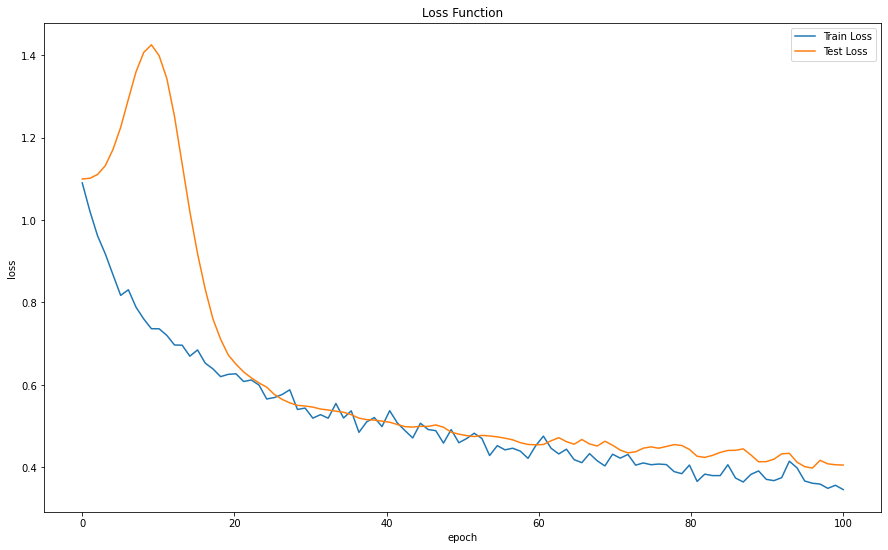

In [8]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

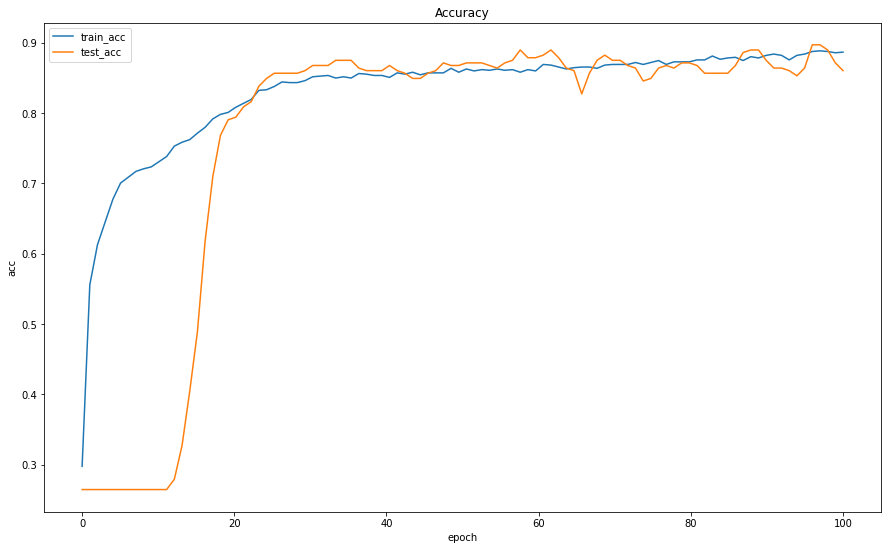

In [9]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [10]:
end = time.time()
print(end-begin)

777.0982048511505


## 增加一层卷积层

In [11]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Linear(256,num_classes)
    def forward(self,X):
        out = self.conv(X)
        out = F.avg_pool2d(out,24)
        out = out.squeeze()
        out = self.fc(out)
        return out

In [12]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.35899	train_acc:0.86267	test_loss:0.45355	 test_acc:0.83824
epoch:40	 train_loss:0.29815	train_acc:0.90783	test_loss:0.37200	 test_acc:0.87132
epoch:60	 train_loss:0.22400	train_acc:0.93180	test_loss:0.34119	 test_acc:0.86029
epoch:80	 train_loss:0.18387	train_acc:0.94839	test_loss:0.28125	 test_acc:0.93015
epoch:100	 train_loss:0.15100	train_acc:0.96498	test_loss:0.25091	 test_acc:0.92647


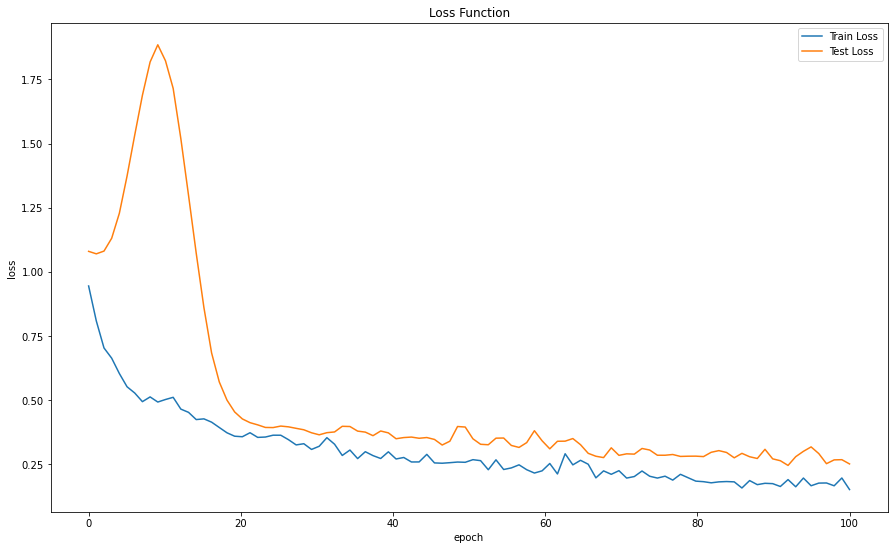

In [13]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

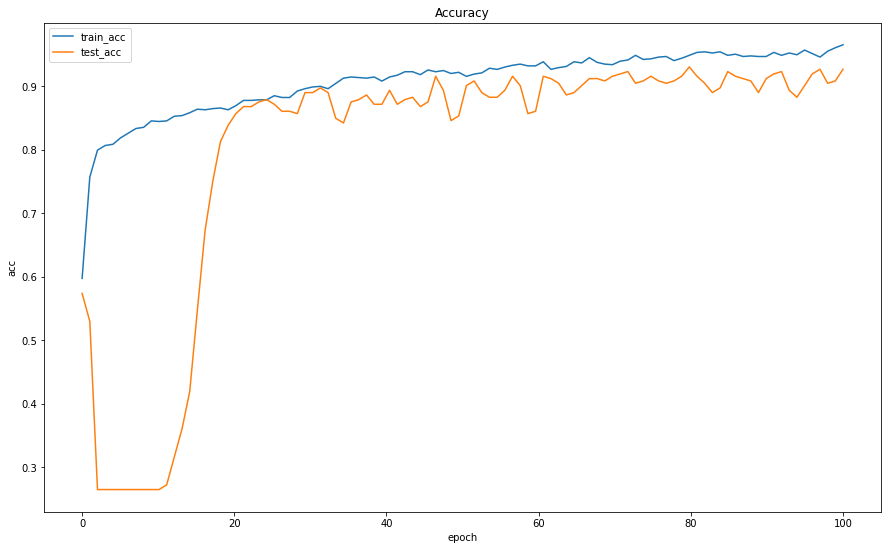

In [14]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [15]:
end = time.time()
print(end-begin)

2107.934915781021


## 增加两层卷积层

In [16]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )
        self.fc = nn.Linear(256,num_classes)
    def forward(self,X):
        out = self.conv(X)
        out = F.avg_pool2d(out,22)
        out = out.squeeze()
        out = self.fc(out)
        return out

In [17]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.29241	train_acc:0.91797	test_loss:0.34182	 test_acc:0.90074
epoch:40	 train_loss:0.20863	train_acc:0.94470	test_loss:0.35212	 test_acc:0.89706
epoch:60	 train_loss:0.14577	train_acc:0.96959	test_loss:0.29640	 test_acc:0.89338
epoch:80	 train_loss:0.09295	train_acc:0.98341	test_loss:0.22576	 test_acc:0.93015
epoch:100	 train_loss:0.07855	train_acc:0.98341	test_loss:0.21571	 test_acc:0.92647


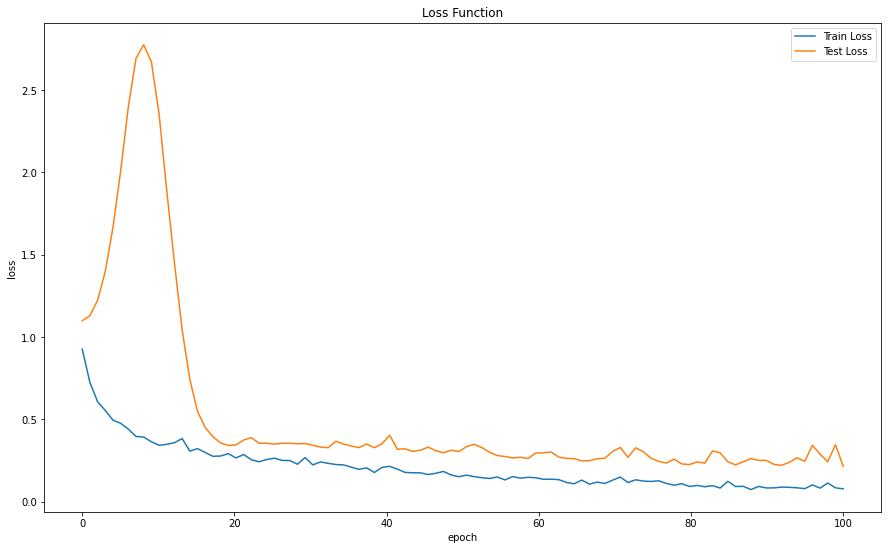

In [18]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

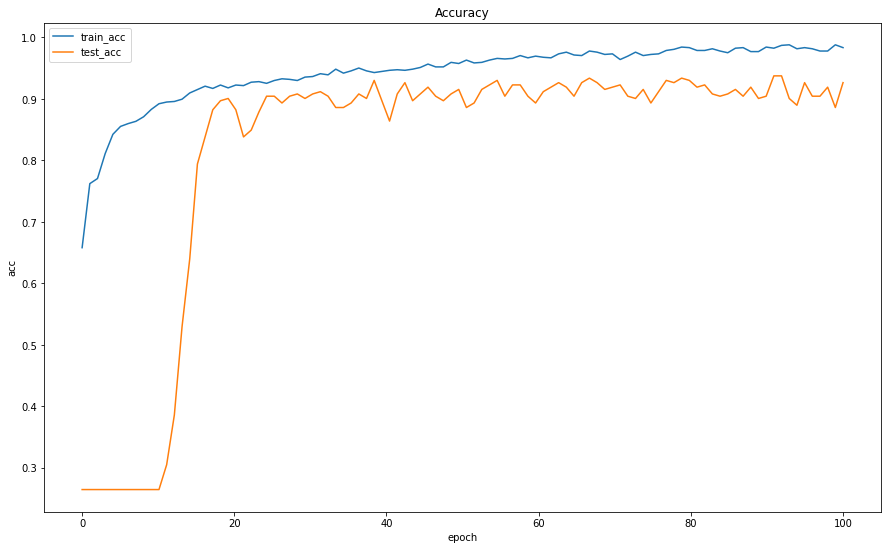

In [19]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [20]:
end = time.time()
print(end-begin)

4256.724415302277


## 学习率调整为 1e-5

In [21]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Linear(128,num_classes)
    def forward(self,X):
        out = self.conv(X)
        out = F.avg_pool2d(out,26)
        out = out.squeeze()
        out = self.fc(out)
        return out

In [22]:
classes = ('bus','car','truck')
num_classes = 3
epochs = 100
lr = 0.00001
batch_size = 512
device=torch.device("cpu")
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=True,num_workers=0)

In [23]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.93036	train_acc:0.77972	test_loss:0.95682	 test_acc:0.77574
epoch:40	 train_loss:0.81501	train_acc:0.80000	test_loss:0.79059	 test_acc:0.80515
epoch:60	 train_loss:0.72883	train_acc:0.79539	test_loss:0.71293	 test_acc:0.83824
epoch:80	 train_loss:0.68019	train_acc:0.80276	test_loss:0.65973	 test_acc:0.83824
epoch:100	 train_loss:0.63626	train_acc:0.81014	test_loss:0.62620	 test_acc:0.84926


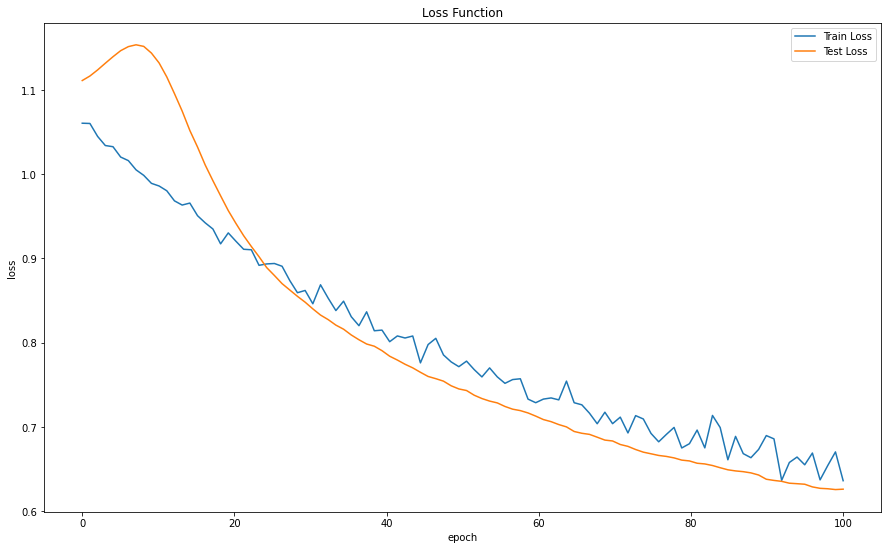

In [24]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

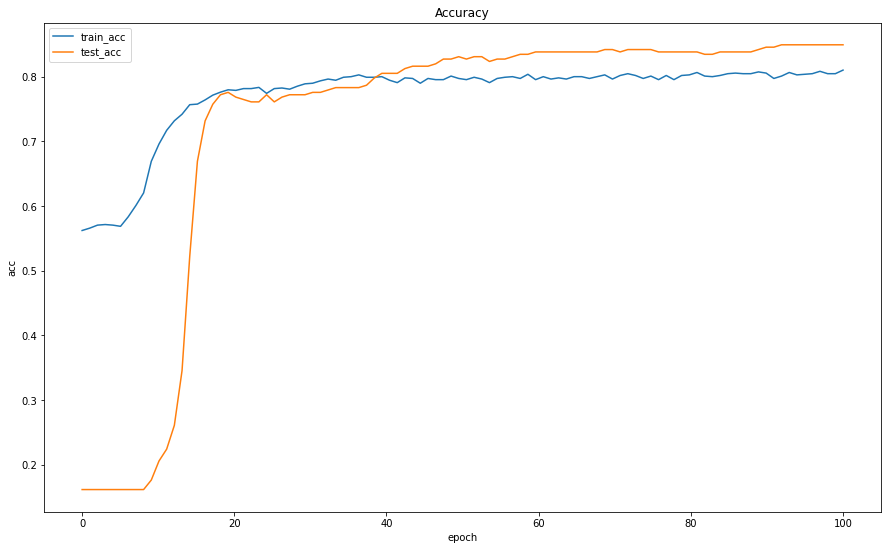

In [25]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [26]:
end = time.time()
print(end-begin)

779.2310588359833


## 学习率调整为 1e-3

In [27]:
classes = ('bus','car','truck')
num_classes = 3
epochs = 100
lr = 0.001
batch_size = 512
device=torch.device("cpu")
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=True,num_workers=0)

In [28]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.31152	train_acc:0.89401	test_loss:0.39444	 test_acc:0.83824
epoch:40	 train_loss:0.21505	train_acc:0.93272	test_loss:0.35880	 test_acc:0.86029
epoch:60	 train_loss:0.18629	train_acc:0.95207	test_loss:0.25093	 test_acc:0.90809
epoch:80	 train_loss:0.13296	train_acc:0.97051	test_loss:0.31831	 test_acc:0.90074
epoch:100	 train_loss:0.09506	train_acc:0.97143	test_loss:0.32630	 test_acc:0.87500


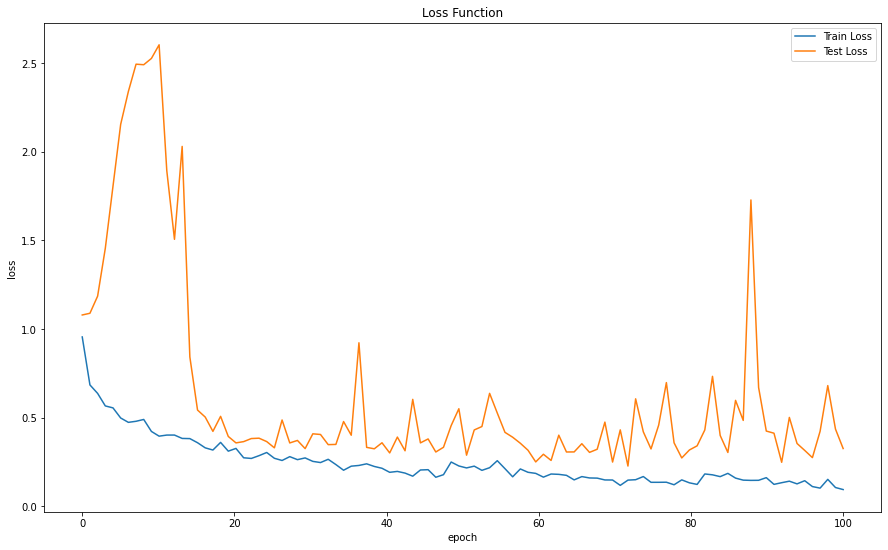

In [29]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

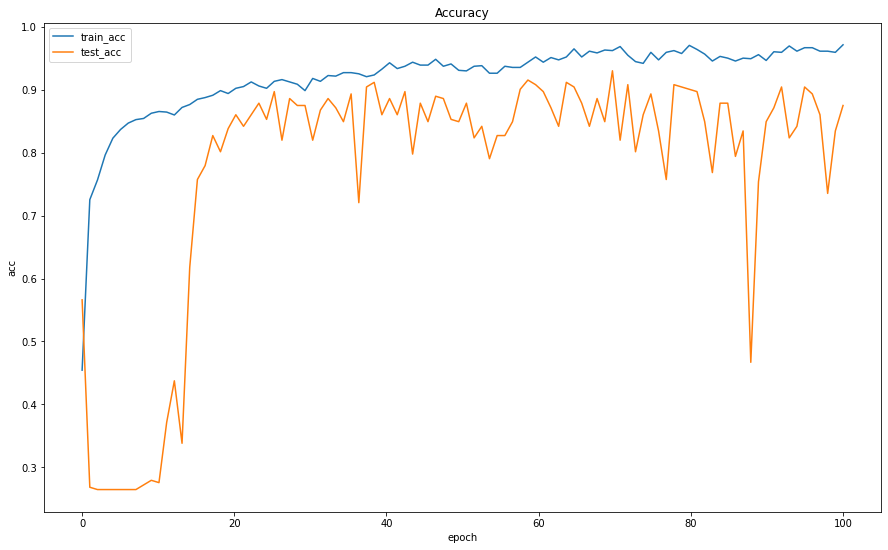

In [30]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [31]:
end = time.time()
print(end-begin)

771.6925539970398
